# Data cleaning, visulalization and feature engineering

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import seaborn as sns

from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

sns.set(style="ticks")

Importing the data

In [2]:
df_train = pd.read_csv('census_income_learn.csv', names = [
    "age",
    " class of worker",
    "detaistry recode",
    "detailed occupation ",
    "education", 
    "wage per hour",
    "enroll in edu inst last wk",
    "marital stat",
    "major industry code ",
    "major occupation code ",
    "race","hispanic origin",
    "sex",
    "member of a labor union",
    "reason for unemployment",
    "full or part time employment s",
    "capital gains",
    "capital losses" ,
    "dividends from stocks",
    "tax filer stat",
    "region of previous residence",
    "state of previous residence",
    "detailed household and family ",
    "detailed household summary in d",
    "migration code-change in msa",
    "   ",
    "migration code-change in reg",
    "migration code-move within reg",
    "live in this house 1 year ago",
    "migration prev res in sunbelt",
    "num persons worked for employe",
    "family members under 18",
    "country of birth father",
    "country of birth mother",
    "country of birth self",
    "citizenship",
    "own business or self employed",
    "fill inc questionnaire for vetd",
    "veterans benefits",
    "weeks worked in year",
    "year",
    "income"])
df_test = pd.read_csv('census_income_test.csv',  names = [
    "age",
    " class of worker",
    "detaistry recode",
    "detailed occupation ",
    "education", 
    "wage per hour",
    "enroll in edu inst last wk",
    "marital stat",
    "major industry code ",
    "major occupation code ",
    "race","hispanic origin",
    "sex",
    "member of a labor union",
    "reason for unemployment",
    "full or part time employment s",
    "capital gains",
    "capital losses" ,
    "dividends from stocks",
    "tax filer stat",
    "region of previous residence",
    "state of previous residence",
    "detailed household and family ",
    "detailed household summary in d",
    "migration code-change in msa",
    "   ",
    "migration code-change in reg",
    "migration code-move within reg",
    "live in this house 1 year ago",
    "migration prev res in sunbelt",
    "num persons worked for employe",
    "family members under 18",
    "country of birth father",
    "country of birth mother",
    "country of birth self",
    "citizenship",
    "own business or self employed",
    "fill inc questionnaire for vetd",
    "veterans benefits",
    "weeks worked in year",
    "year",
    "income"])

df_0 = df_train.copy()
df_test_0 = df_test.copy()

Let's have a quick view over the database

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
age                                199523 non-null int64
 class of worker                   199523 non-null object
detaistry recode                   199523 non-null int64
detailed occupation                199523 non-null int64
education                          199523 non-null object
wage per hour                      199523 non-null int64
enroll in edu inst last wk         199523 non-null object
marital stat                       199523 non-null object
major industry code                199523 non-null object
major occupation code              199523 non-null object
race                               199523 non-null object
hispanic origin                    199523 non-null object
sex                                199523 non-null object
member of a labor union            199523 non-null object
reason for unemployment            199523 non-null object
full or part time emplo

In [4]:
df_train.replace("Not in universe", np.nan, regex=True, inplace = True)
df_train.replace("\?", np.nan, regex=True, inplace = True)

In [5]:
# df_test.head(100)
# df_train.describe()
df_train.isnull().sum()

age                                     0
 class of worker                   100245
detaistry recode                        0
detailed occupation                     0
education                               0
wage per hour                           0
enroll in edu inst last wk         186943
marital stat                            0
major industry code                100684
major occupation code              100684
race                                    0
hispanic origin                         0
sex                                     0
member of a labor union            180459
reason for unemployment            193453
full or part time employment s          0
capital gains                           0
capital losses                          0
dividends from stocks                   0
tax filer stat                          0
region of previous residence       183750
state of previous residence        184458
detailed household and family           0
detailed household summary in d   

Dropping columns with too many NANs and the variables for which I don't understand the meaning

In [6]:
df_train = df_train.drop([' class of worker', 'enroll in edu inst last wk', 'major industry code ',
                          'major occupation code ', 'member of a labor union', "reason for unemployment",
                         "member of a labor union", "reason for unemployment", "region of previous residence",
                         "state of previous residence", "live in this house 1 year ago", "migration prev res in sunbelt",
                         "family members under 18", "fill inc questionnaire for vetd",  "   ","migration code-change in reg",
                         "migration code-move within reg", "detaistry recode", "veterans benefits", "migration code-change in msa"], axis=1)
df_test = df_test.drop([' class of worker', 'enroll in edu inst last wk', 'major industry code ',
                          'major occupation code ', 'member of a labor union', "reason for unemployment",
                         "member of a labor union", "reason for unemployment", "region of previous residence",
                         "state of previous residence", "live in this house 1 year ago", "migration prev res in sunbelt",
                         "family members under 18", "fill inc questionnaire for vetd",  "   ","migration code-change in reg",
                         "migration code-move within reg", "detaistry recode", "veterans benefits", "migration code-change in msa"], axis=1)


Let's have a new look at the missing data

In [7]:
df_train.isnull().sum()

age                                   0
detailed occupation                   0
education                             0
wage per hour                         0
marital stat                          0
race                                  0
hispanic origin                       0
sex                                   0
full or part time employment s        0
capital gains                         0
capital losses                        0
dividends from stocks                 0
tax filer stat                        0
detailed household and family         0
detailed household summary in d       0
num persons worked for employe        0
country of birth father            6713
country of birth mother            6119
country of birth self              3393
citizenship                           0
own business or self employed         0
weeks worked in year                  0
year                                  0
income                                0
dtype: int64

Dropping the lines with missing data, they represent less than 1% of the data.

In [8]:
df_train = df_train.dropna(axis=0, how='any')

Now let's take a look on the database

In [9]:
df_train.head(200)

,age,detailed occupation,education,wage per hour,marital stat,race,hispanic origin,sex,full or part time employment s,capital gains,capital losses,dividends from stocks,tax filer stat,detailed household and family,detailed household summary in d,num persons worked for employe,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,weeks worked in year,year,income
0,73,0,High school graduate,0,Widowed,White,All other,Female,Not in labor force,0,0,0,Nonfiler,Other Rel 18+ ever marr not in subfamily,Other relative of householder,0,United-States,United-States,United-States,Native- Born in the United States,0,0,95,- 50000.
1,58,34,Some college but no degree,0,Divorced,White,All other,Male,Children or Armed Forces,0,0,0,Head of household,Householder,Householder,1,United-States,United-States,United-States,Native- Born in the United States,0,52,94,- 50000.
2,18,0,10th grade,0,Never married,Asian or Pacific Islander,All other,Female,Not in labor force,0,0,0,Nonfiler,Child 18+ never marr Not in a subfamily,Child 18 or older,0,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,0,95,- 50000.
3,9,0,Children,0,Never married,White,All other,Female,Children or Armed Forces,0,0,0,Nonfiler,Child <18 never marr not in subfamily,Child under 18 never married,0,United-States,United-States,United-States,Native- Born in the United States,0,0,94,- 50000.
4,10,0,Children,0,Never married,White,All other,Female,Children or Armed Forces,0,0,0,Nonfiler,Child <18 never marr not in subfamily,Child under 18 never married,0,United-States,United-States,United-States,Native- Born in the United States,0,0,94,- 50000.
5,48,10,Some college but no degree,1200,Married-civilian spouse present,Amer Indian Aleut or Eskimo,All other,Female,Full-time schedules,0,0,0,Joint both under 65,Spouse of householder,Spouse of householder,1,Philippines,United-States,United-States,Native- Born in the United States,2,52,95,- 50000.
6,42,3,Bachelors degree(BA AB BS),0,Married-civilian spouse present,White,All other,Male,Children or Armed Forces,5178,0,0,Joint both under 65,Householder,Householder,6,United-States,United-States,United-States,Native- Born in the United States,0,52,94,- 50000.
7,28,40,High school graduate,0,Never married,White,All other,Female,Unemployed full-time,0,0,0,Single,Secondary individual,Nonrelative of householder,4,United-States,United-States,United-States,Native- Born in the United States,0,30,95,- 50000.
8,47,26,Some college but no degree,876,Married-civilian spouse present,White,All other,Female,Full-time schedules,0,0,0,Joint both under 65,Spouse of householder,Spouse of householder,5,United-States,United-States,United-States,Native- Born in the United States,0,52,95,- 50000.
9,34,37,Some college but no degree,0,Married-civilian spouse present,White,All other,Male,Children or Armed Forces,0,0,0,Joint both under 65,Householder,Householder,6,United-States,United-States,United-States,Native- Born in the United States,0,52,94,- 50000.


We replace the countries variables to binary variables : US / not US

In [10]:
df_train.ix[df_train["country of birth father"].str.contains('United-States') == False, "country of birth father"] = "Other"
df_train.ix[df_train["country of birth mother"].str.contains('United-States') == False, "country of birth mother"] = "Other"
df_train.ix[df_train["country of birth self"].str.contains('United-States') == False, "country of birth self"] = "Other"

df_test.ix[df_test["country of birth father"].str.contains('United-States') == False, "country of birth father"] = "Other"
df_test.ix[df_test["country of birth mother"].str.contains('United-States') == False, "country of birth mother"] = "Other"
df_test.ix[df_test["country of birth self"].str.contains('United-States') == False, "country of birth self"] = "Other"

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191239 entries, 0 to 199521
Data columns (total 24 columns):
age                                191239 non-null int64
detailed occupation                191239 non-null int64
education                          191239 non-null object
wage per hour                      191239 non-null int64
marital stat                       191239 non-null object
race                               191239 non-null object
hispanic origin                    191239 non-null object
sex                                191239 non-null object
full or part time employment s     191239 non-null object
capital gains                      191239 non-null int64
capital losses                     191239 non-null int64
dividends from stocks              191239 non-null int64
tax filer stat                     191239 non-null object
detailed household and family      191239 non-null object
detailed household summary in d    191239 non-null object
num persons worked for em

Converting the data types

In [12]:
df_train[["detailed occupation ","education","marital stat","race","hispanic origin",
          "sex","full or part time employment s","detailed household and family ","detailed household summary in d",
          "num persons worked for employe","country of birth father",
          "country of birth mother","country of birth self","citizenship","own business or self employed",
          "income", "tax filer stat"]] = df_train[["detailed occupation ","education","marital stat","race",
                                                   "hispanic origin","sex","full or part time employment s",
          "detailed household and family ","detailed household summary in d","num persons worked for employe","country of birth father",
          "country of birth mother","country of birth self","citizenship","own business or self employed",
          "income", "tax filer stat"]].apply(pd.Categorical)

df_test[["detailed occupation ","education","marital stat","race","hispanic origin",
          "sex","full or part time employment s","detailed household and family ","detailed household summary in d",
          "num persons worked for employe","country of birth father",
          "country of birth mother","country of birth self","citizenship","own business or self employed",
          "income", "tax filer stat"]] = df_test[["detailed occupation ","education","marital stat","race",
                                                   "hispanic origin","sex","full or part time employment s",
          "detailed household and family ","detailed household summary in d","num persons worked for employe","country of birth father",
          "country of birth mother","country of birth self","citizenship","own business or self employed",
          "income", "tax filer stat"]].apply(pd.Categorical)

In [13]:
# df_train["marital stat"].describe()
# df_train["marital stat"].cat.codes

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191239 entries, 0 to 199521
Data columns (total 24 columns):
age                                191239 non-null int64
detailed occupation                191239 non-null category
education                          191239 non-null category
wage per hour                      191239 non-null int64
marital stat                       191239 non-null category
race                               191239 non-null category
hispanic origin                    191239 non-null category
sex                                191239 non-null category
full or part time employment s     191239 non-null category
capital gains                      191239 non-null int64
capital losses                     191239 non-null int64
dividends from stocks              191239 non-null int64
tax filer stat                     191239 non-null category
detailed household and family      191239 non-null category
detailed household summary in d    191239 non-null category
num 

The conversion was successful

In [15]:
# df_train["marital stat"].describe()
# df_train["marital stat"].cat.codes

Convert categorical columns to numeric for a first descriptive analysis

In [16]:
cat_columns = df_train.select_dtypes(['category']).columns
df_train_copy = df_train.copy()
df_train_copy[cat_columns] = df_train[cat_columns].apply(lambda x: x.cat.codes)

In [17]:
df_train_copy.head(200)

,age,detailed occupation,education,wage per hour,marital stat,race,hispanic origin,sex,full or part time employment s,capital gains,capital losses,dividends from stocks,tax filer stat,detailed household and family,detailed household summary in d,num persons worked for employe,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,weeks worked in year,year,income
0,73,0,12,0,6,4,0,0,2,0,0,0,4,24,6,0,0,0,0,4,0,0,95,0
1,58,34,16,0,0,4,0,1,0,0,0,0,0,20,4,1,0,0,0,4,0,52,94,0
2,18,0,0,0,4,1,0,0,2,0,0,0,4,2,0,0,1,1,1,0,0,0,95,0
3,9,0,10,0,4,4,0,0,0,0,0,0,4,8,2,0,0,0,0,4,0,0,94,0
4,10,0,10,0,4,4,0,0,0,0,0,0,4,8,2,0,0,0,0,4,0,0,94,0
5,48,10,16,1200,2,0,0,0,1,0,0,0,2,37,7,1,1,0,0,4,2,52,95,0
6,42,3,9,0,2,4,0,1,0,5178,0,0,2,20,4,6,0,0,0,4,0,52,94,0
7,28,40,12,0,4,4,0,0,6,0,0,0,5,35,5,4,0,0,0,4,0,30,95,0
8,47,26,16,876,2,4,0,0,1,0,0,0,2,37,7,5,0,0,0,4,0,52,95,0
9,34,37,16,0,2,4,0,1,0,0,0,0,2,20,4,6,0,0,0,4,0,52,94,0


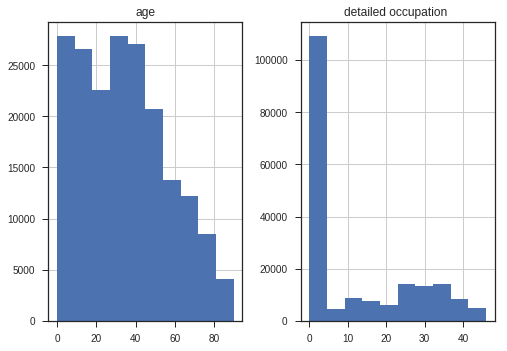

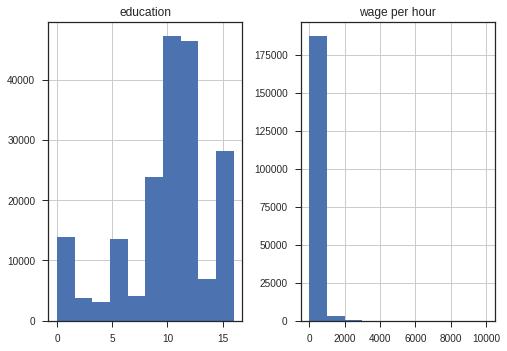

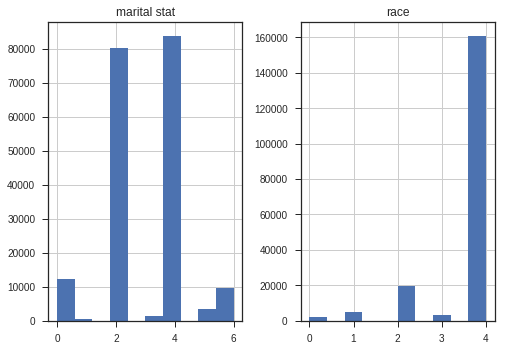

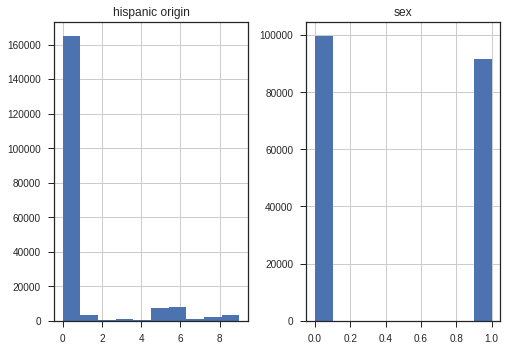

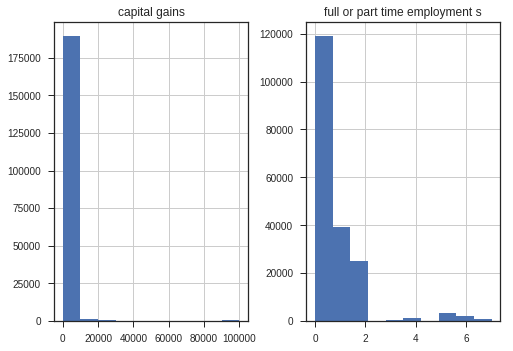

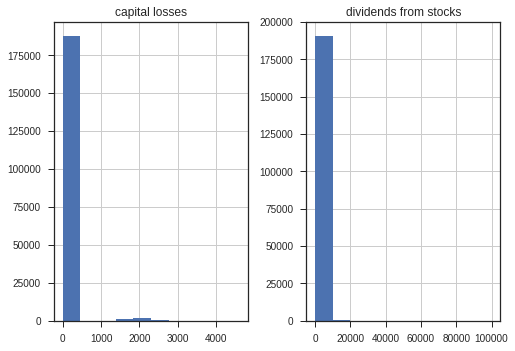

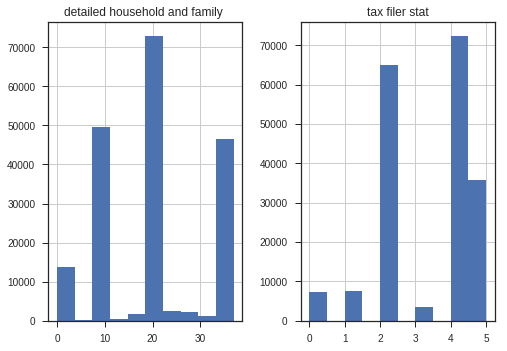

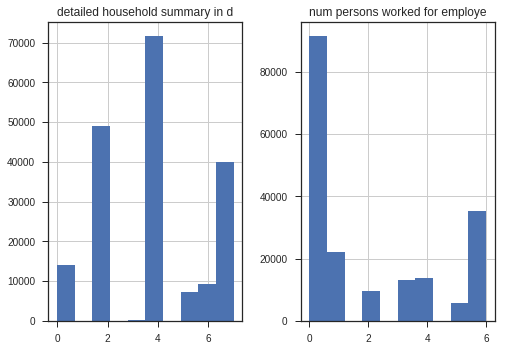

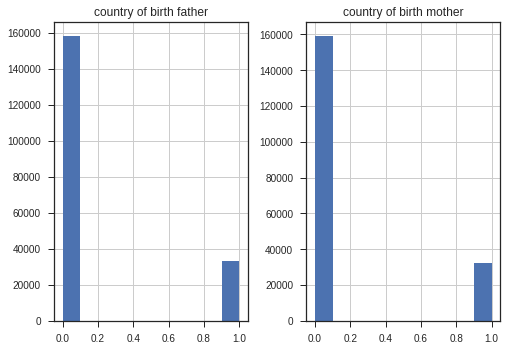

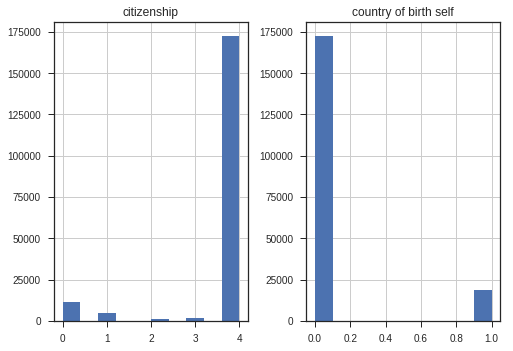

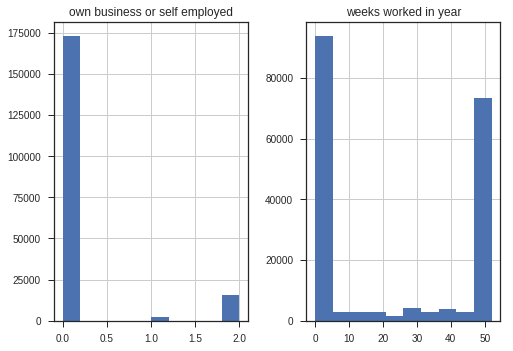

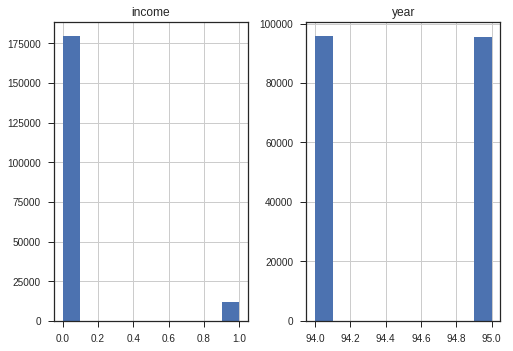

In [18]:
for i in range(12) :
    df_train_copy.iloc[:,i*2:(i+1)*2].hist()

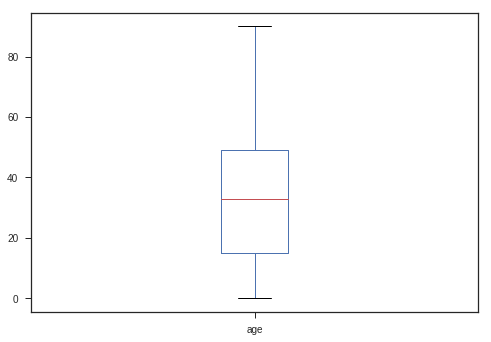

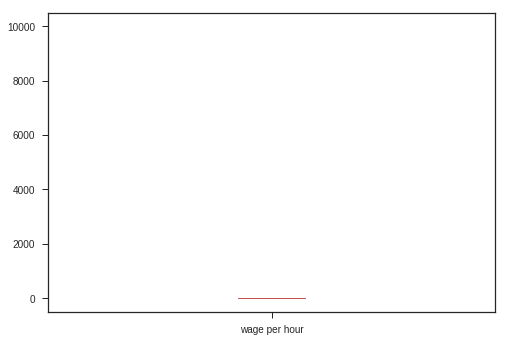

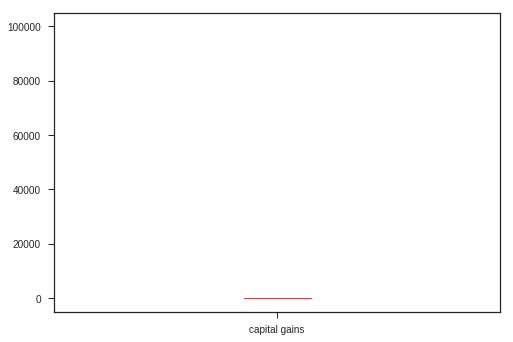

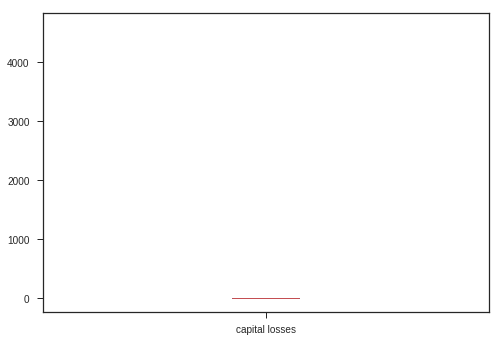

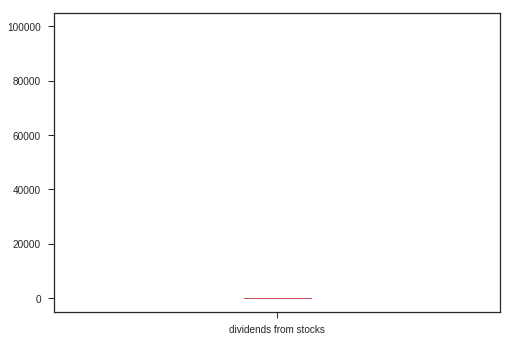

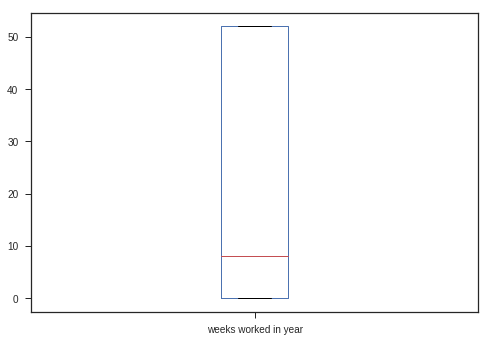

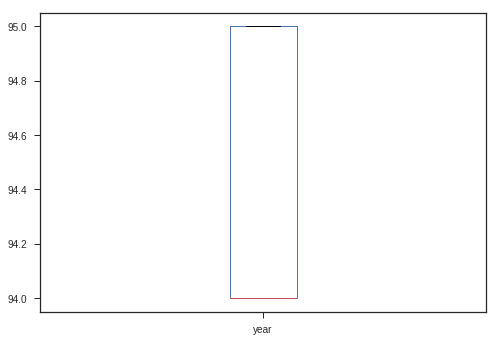

In [19]:
for i in range(7):
    df_train_copy.select_dtypes(include = ["int64"]).iloc[:,i:i+1].plot(kind="box")

There are only two years I will drop the variable year

In [20]:
df_train = df_train.drop(["year", "detailed household and family "], axis=1)
df_test = df_test.drop(["year", "detailed household and family "], axis=1)

We also notice that the vraiables wage, capital gains and losses are more than 95% of the time equal to 0.

In [21]:
zeros = np.sum(df_train["wage per hour"].as_matrix() == 0 )
sizeall = np.size(df_train["wage per hour"])
print(zeros/sizeall)

0.9425326424


In [22]:
zeros = np.sum(df_train["capital gains"].as_matrix() == 0 )
sizeall = np.size(df_train["capital gains"])
print(zeros/sizeall)

0.963595291755


In [23]:
zeros = np.sum(df_train["capital gains"].as_matrix() == 0 )
sizeall = np.size(df_train["dividends from stocks"])
print(zeros/sizeall)

0.963595291755


Let's have a look at the correlation matrix

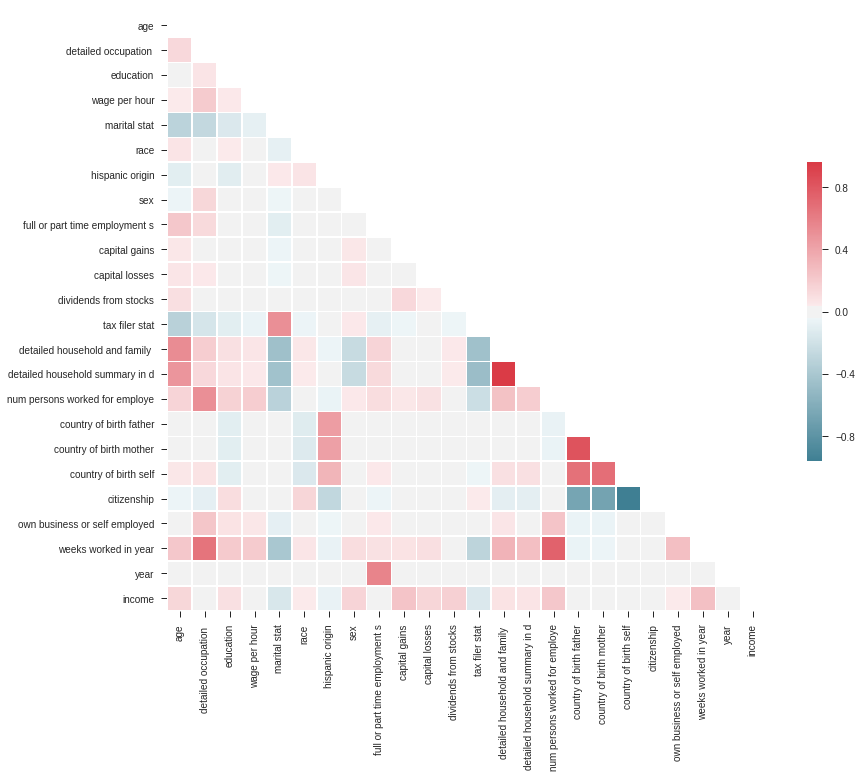

In [24]:
# Compute the correlation matrix
corr = df_train_copy.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

I drop the detailed occupation, there are too many attributes and the correlation is very week, the meaning is also not explicit.

In [25]:
df_train = df_train.drop(["detailed occupation "], axis=1)

df_test = df_test.drop(["detailed occupation "], axis=1)

Merging some variables to create more relevant ones, however since we don't know how many hours they work per week me cannot add the wage rate and the total earnings (not the same scale)

In [26]:
df_train["wage_rate"] = df_train["wage per hour"] * df_train["weeks worked in year"]
df_train = df_train.drop(["wage per hour", "weeks worked in year"], axis=1)

df_test["wage_rate"] = df_test["wage per hour"] * df_test["weeks worked in year"]
df_test = df_test.drop(["wage per hour", "weeks worked in year"], axis=1)

In [27]:
df_train['Total Earnings'] = df_train["capital gains"] - df_train["capital losses"] 
df_train['Total Earnings'] = df_train['Total Earnings'] + df_train["dividends from stocks"]
df_train = df_train.drop(["capital gains", "capital losses", "dividends from stocks"], axis=1)

df_test['Total Earnings'] = df_test["capital gains"] - df_test["capital losses"] 
df_test['Total Earnings'] = df_test['Total Earnings'] + df_test["dividends from stocks"]
df_test = df_test.drop(["capital gains", "capital losses", "dividends from stocks"], axis=1)

There are 17 levels of education in the database :

In [28]:
df_train["education"].describe()

count                    191239
unique                       17
top        High school graduate
freq                      46427
Name: education, dtype: object

In [29]:
cat_columns = df_train.select_dtypes(['category']).columns
df_train_copy2 = df_train.copy()
df_train_copy2[cat_columns] = df_train[cat_columns].apply(lambda x: x.cat.codes)

Taking a new look at the dataset after the previous operations

In [30]:
df_train_copy2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191239 entries, 0 to 199521
Data columns (total 18 columns):
age                                191239 non-null int64
education                          191239 non-null int8
marital stat                       191239 non-null int8
race                               191239 non-null int8
hispanic origin                    191239 non-null int8
sex                                191239 non-null int8
full or part time employment s     191239 non-null int8
tax filer stat                     191239 non-null int8
detailed household summary in d    191239 non-null int8
num persons worked for employe     191239 non-null int8
country of birth father            191239 non-null int8
country of birth mother            191239 non-null int8
country of birth self              191239 non-null int8
citizenship                        191239 non-null int8
own business or self employed      191239 non-null int8
income                             191239 non-nu

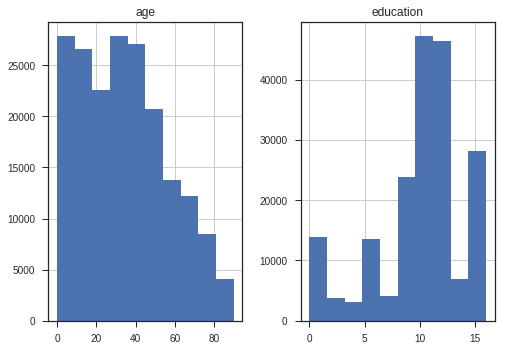

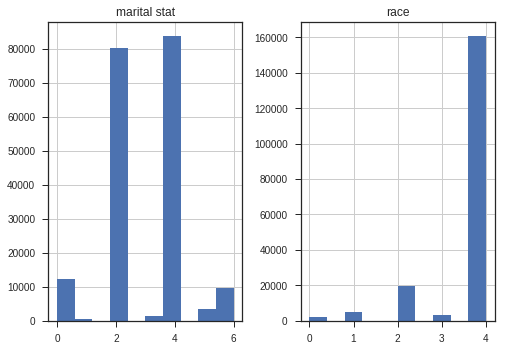

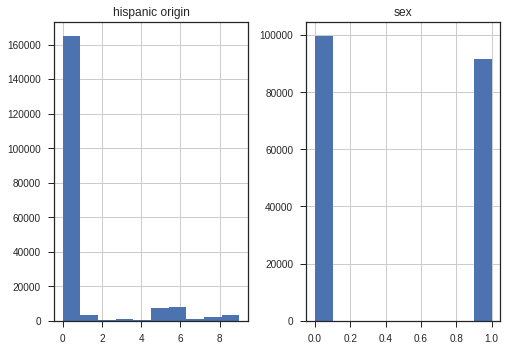

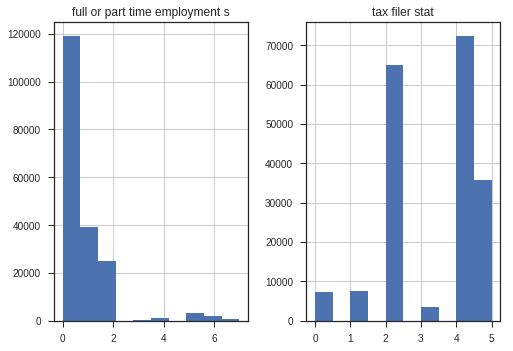

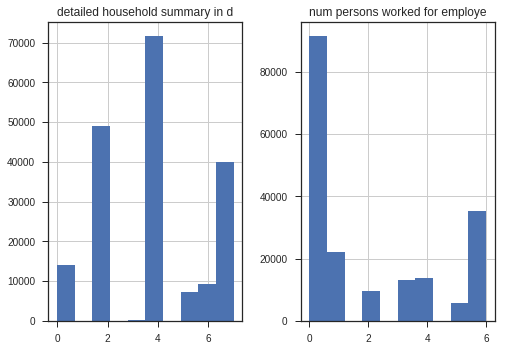

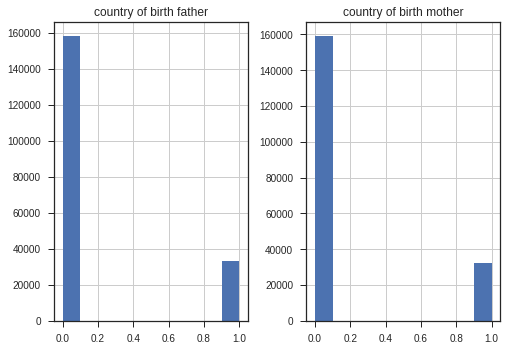

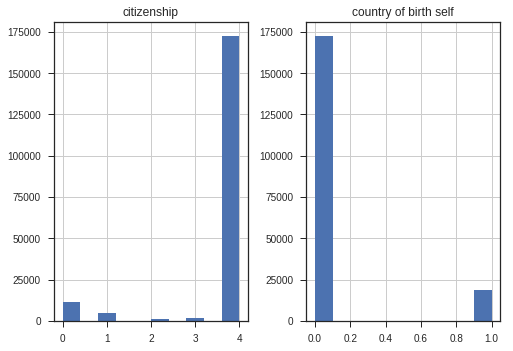

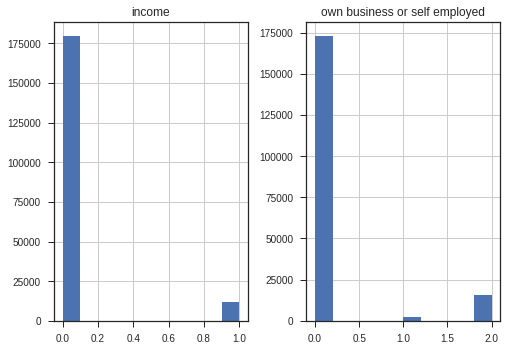

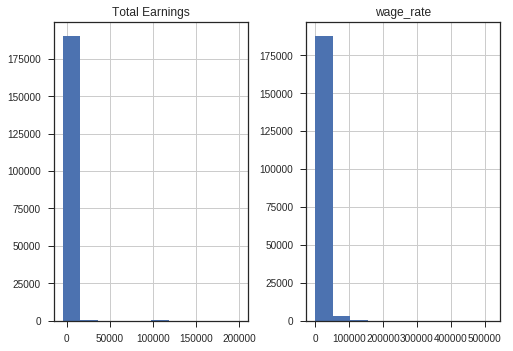

In [31]:
for i in range(9) :
    df_train_copy2.iloc[:,i*2:(i+1)*2].hist()

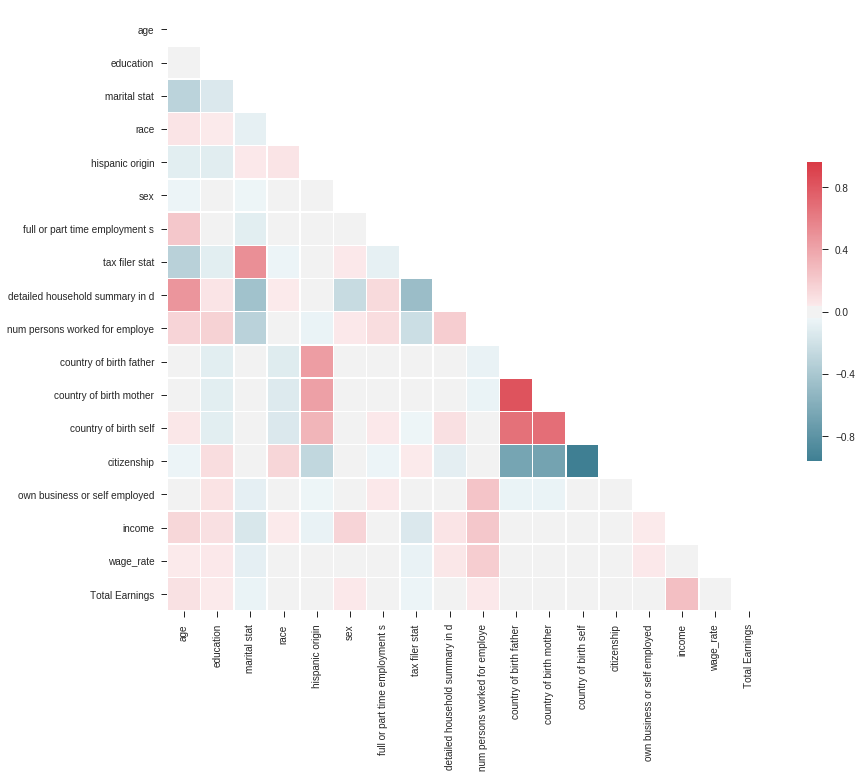

In [32]:
# Compute the correlation matrix
corr = df_train_copy2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

For the last model, we create dummy variables for the categorical data. 

In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191239 entries, 0 to 199521
Data columns (total 18 columns):
age                                191239 non-null int64
education                          191239 non-null category
marital stat                       191239 non-null category
race                               191239 non-null category
hispanic origin                    191239 non-null category
sex                                191239 non-null category
full or part time employment s     191239 non-null category
tax filer stat                     191239 non-null category
detailed household summary in d    191239 non-null category
num persons worked for employe     191239 non-null category
country of birth father            191239 non-null category
country of birth mother            191239 non-null category
country of birth self              191239 non-null category
citizenship                        191239 non-null category
own business or self employed      191239 non-null c

I chose to drop the following variables, they don't seem to be relevant in the correlation matrix, it will decrease the variables space dimension

In [34]:
df_train = df_train.drop(["country of birth father", "country of birth mother", "country of birth self", "citizenship", "full or part time employment s"], axis=1)

df_test = df_test.drop(["country of birth father", "country of birth mother", "country of birth self", "citizenship", "full or part time employment s"], axis=1)

I create dummy variables for the unordered categorical data

In [35]:
df2 = pd.get_dummies(df_train[['marital stat', 'race', 'hispanic origin', 'tax filer stat', "detailed household summary in d", "own business or self employed"]]
               , prefix=['marital_stat', 'race', 'hispanic_origin', 'tax_filer_stat' ,'detailed_household_sum', 'own_business_or_self_employed ' ])

df2_test = pd.get_dummies(df_test[['marital stat', 'race', 'hispanic origin', 'tax filer stat', "detailed household summary in d", "own business or self employed"]]
               , prefix=['marital_stat', 'race', 'hispanic_origin', 'tax_filer_stat' ,'detailed_household_sum', 'own_business_or_self_employed ' ])


df2

,marital_stat_ Divorced,marital_stat_ Married-A F spouse present,marital_stat_ Married-civilian spouse present,marital_stat_ Married-spouse absent,marital_stat_ Never married,marital_stat_ Separated,marital_stat_ Widowed,race_ Amer Indian Aleut or Eskimo,race_ Asian or Pacific Islander,race_ Black,race_ Other,race_ White,hispanic_origin_ All other,hispanic_origin_ Central or South American,hispanic_origin_ Chicano,hispanic_origin_ Cuban,hispanic_origin_ Do not know,hispanic_origin_ Mexican (Mexicano),hispanic_origin_ Mexican-American,hispanic_origin_ NA,hispanic_origin_ Other Spanish,hispanic_origin_ Puerto Rican,tax_filer_stat_ Head of household,tax_filer_stat_ Joint both 65+,tax_filer_stat_ Joint both under 65,tax_filer_stat_ Joint one under 65 & one 65+,tax_filer_stat_ Nonfiler,tax_filer_stat_ Single,detailed_household_sum_ Child 18 or older,detailed_household_sum_ Child under 18 ever married,detailed_household_sum_ Child under 18 never married,detailed_household_sum_ Group Quarters- Secondary individual,detailed_household_sum_ Householder,detailed_household_sum_ Nonrelative of householder,detailed_household_sum_ Other relative of householder,detailed_household_sum_ Spouse of householder,own_business_or_self_employed _0,own_business_or_self_employed _1,own_business_or_self_employed _2
0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
5,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
6,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
7,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
8,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0
9,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0


Because of the linear relationship between the variables I have to drop one attribute for each variable

In [36]:
df_train2 = pd.concat([df_train, df2], axis = 1).copy()
df_train2 = df_train2.drop(['hispanic_origin_ Chicano', 'marital_stat_ Widowed', 'race_ Amer Indian Aleut or Eskimo', 'tax_filer_stat_ Head of household', "detailed_household_sum_ Child under 18 never married", "own_business_or_self_employed _1"], axis=1)
df_train2 = df_train2.drop(['marital stat', 'race', 'hispanic origin', 'tax filer stat', "detailed household summary in d", "own business or self employed"], axis=1)

df_test2 = pd.concat([df_test, df2_test], axis = 1).copy()
df_test2 = df_test2.drop(['hispanic_origin_ Chicano', 'marital_stat_ Widowed', 'race_ Amer Indian Aleut or Eskimo', 'tax_filer_stat_ Head of household', "detailed_household_sum_ Child under 18 never married", "own_business_or_self_employed _1"], axis=1)
df_test2 = df_test2.drop(['marital stat', 'race', 'hispanic origin', 'tax filer stat', "detailed household summary in d", "own business or self employed"], axis=1)

In [37]:
cat_columns = df_train2.select_dtypes(['category']).columns
df_train2[cat_columns] = df_train2[cat_columns].apply(lambda x: x.cat.codes)

cat_columns = df_test2.select_dtypes(['category']).columns
df_test2[cat_columns] = df_test2[cat_columns].apply(lambda x: x.cat.codes)

In [38]:
df_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191239 entries, 0 to 199521
Data columns (total 40 columns):
age                                                             191239 non-null int64
education                                                       191239 non-null int8
sex                                                             191239 non-null int8
num persons worked for employe                                  191239 non-null int8
income                                                          191239 non-null int8
wage_rate                                                       191239 non-null int64
Total Earnings                                                  191239 non-null int64
marital_stat_ Divorced                                          191239 non-null uint8
marital_stat_ Married-A F spouse present                        191239 non-null uint8
marital_stat_ Married-civilian spouse present                   191239 non-null uint8
marital_stat_ Married-spouse abse

In [39]:
df_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99762 entries, 0 to 99761
Data columns (total 40 columns):
age                                                             99762 non-null int64
education                                                       99762 non-null int8
sex                                                             99762 non-null int8
num persons worked for employe                                  99762 non-null int8
income                                                          99762 non-null int8
wage_rate                                                       99762 non-null int64
Total Earnings                                                  99762 non-null int64
marital_stat_ Divorced                                          99762 non-null uint8
marital_stat_ Married-A F spouse present                        99762 non-null uint8
marital_stat_ Married-civilian spouse present                   99762 non-null uint8
marital_stat_ Married-spouse absent          

# Model Training and Testing

Split train into train and crossval

In [40]:
Y_train_df = df_train2["income"]
X_train_df = df_train2.copy()
X_train_df = X_train_df.drop(["income"], axis = 1)

Y_test_df = df_test2["income"]
X_test_df = df_test2.copy()
X_test_df = X_test_df.drop(["income"], axis = 1)

In [41]:
X_train = X_train_df.as_matrix()
Y_train = Y_train_df.as_matrix()

X_test = X_test_df.as_matrix()
Y_test = Y_test_df.as_matrix()

In [42]:
np.shape(X_test)

(99762, 39)

Let's try the random forest algorithm, we run a cross validation to determine the optimal number of estimators

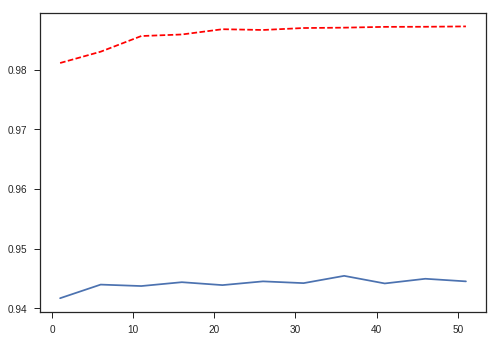

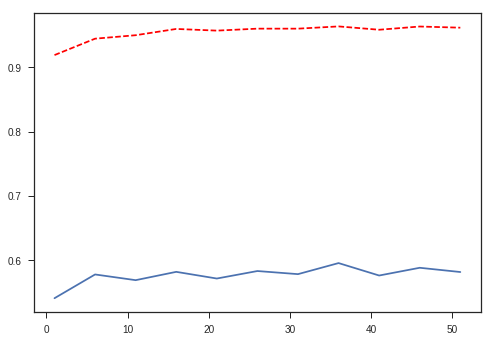

In [43]:
X_train_0, X_val, Y_train_0, Y_val = train_test_split(X_train, Y_train, 
                                                      test_size=0.3, 
                                                      random_state=np.random.randint(40))

train_accuracy = []
val_accuracy = []

train_precision = []
val_precision = []

runs = 12

for i in range(1,runs):
    
    forest = RandomForestClassifier(n_estimators = 5*i)
    forest = forest.fit(X_train_0, Y_train_0)
    
    pred_train_0 = forest.predict(X_train_0)
    pred_val_0 = forest.predict(X_val)
    
    train_accuracy.append(accuracy_score(y_pred=pred_train_0, y_true=Y_train_0))
    val_accuracy.append(accuracy_score(y_pred=pred_val_0, y_true=Y_val))
    
    train_precision.append(precision_score(y_pred=pred_train_0, y_true=Y_train_0))
    val_precision.append(precision_score(y_pred=pred_val_0, y_true=Y_val))

t = np.arange(1, 5 * (runs-1), 5)

# red dashes, blue squares
plt.plot(t,train_accuracy, 'r--', t, val_accuracy, '-')
plt.show()

plt.plot(t,train_precision, 'r--', t, val_precision, '-')
plt.show()

In [44]:
nb_estimators = 50

forest = RandomForestClassifier(n_estimators = nb_estimators)
forest = forest.fit(X_train, Y_train)

pred_train = forest.predict(X_train)
pred_test = forest.predict(X_test)
print("Test accuracy")
print(accuracy_score(y_pred=pred_test, y_true=Y_test))
print("Test precision")
print(precision_score(y_pred=pred_test, y_true=Y_test))

Test accuracy
0.945871173393
Test precision
0.599695585997


Logistic Regression model

In [49]:
LogitModel = LogisticRegressionCV()
LogitModel = LogitModel.fit(X_train, Y_train)

pred_test = LogitModel.predict(X_test)
print(accuracy_score(y_pred=pred_test, y_true=Y_test))
print(precision_score(y_pred=pred_test, y_true=Y_test))

0.943986688318
0.807613168724


In [51]:
print(LogitModel.coef_)

[[ -3.73279191e-03  -1.83661549e-02   4.87860782e-01   1.75920671e-01
   -2.86766677e-06   1.51253352e-04  -2.74146575e-02  -1.95009658e-02
    6.61409272e-02  -1.86557498e-02  -9.41869499e-01  -6.08530450e-02
   -3.82978163e-02  -3.51145182e-01  -1.09375034e-01  -5.03851711e-01
   -3.72636631e-01  -9.49036306e-02  -1.42512089e-02  -8.56814109e-03
   -2.44834111e-01  -1.77525846e-01  -9.37107874e-03  -5.48750411e-02
   -7.71863428e-02  -2.28469658e-02   1.40467008e-01  -8.21853655e-03
   -8.78403891e-01  -1.63663356e-01  -2.40118498e-01  -2.09003659e-03
   -1.12078196e-03   4.47818361e-01  -7.83427378e-02  -1.45330595e-01
   -3.93481174e-01  -7.60119815e-01  -3.64219603e-01]]
